## Final Project Submission

Please fill out:
* Student name: Deztany Jackson
* Student pace: self paced 
* Scheduled project review date/time: Friday December 23, 2022 11AM
* Instructor name:  Morgan Jones
* Blog post URL: http://dmvinedata.com/blog/


## Home Improvement House Predictions

### Authors: Deztany Jackson

# Business Understanding

## Overview

Real Estate agents in King County, Seattle are evaluating the neighborhoods to encourage home owners of he benefits of improving and upgrading their property value. Housing data from King County was used to develop linear regressions models to support future price prediction.  

The primary stakeholders are real estate agents because of their wide use cases, network, domain knowledge and their incentive for home owners to increase their property value. They can also use this for getting a jump start on  marketing to potential home buyers. The same predictions could be useful for the homeowners, potential buyers and even those in the remodeling and construction business. Because of their connection and  real estate agents are able to influence a larger community's property value which as greater impact than convinving individual homeowners. 
The area attracts new implants from tech jobs. A great number of these people (as singles or families) may be looking to buy or rent.

This model is used as an intial model supportingmedium course predictions.
The main attributes used to support model prediciton are: Condition and Grade.
The main attributes used to support model creation:
  I would not garuntee the price predicions are 100%
accurate.  
The model used accounts for 67% variability. This means there are things that the model still doesn account for 
in making predictions. 

 [Phase 1 Project Description](https://learning.flatironschool.com/courses/4964/pages/phase-2-project-description), 2022

# Data Understanding

In [ ]:
#Add a part where there is a description for the data used
#The waterfront to fill or delte moves to data prep
#Use a correlation matrix to understand the data more
#Fill out the questions of Data Understanding in the markdown section
#Descriptive statistis for each of the features used
#check shape is correct
#Add a new column for missing Waterfront prop? No, if we included view maybe

This project uses the King County House Sales dataset (from GitHub project repo). This can be found in several locations: [Git Hub Data](https://github.com/learn-co-curriculum/dsc-phase-2-project-v2-3/tree/main/data) & [Kaggle](https://www.kaggle.com/datasets/harlfoxem/housesalesprediction). 

It is in the format of csv. The initial data used in the modeling will start with XX of possible attributes. As modeling progressing certain attributes (features) will be processed, transformed and possibly removed.



In [2]:
#Imports necessary intial libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 500)

The imported data is the entire initial dataset. This will be scope down before the intial understanding to support the the core modeling needs


In [3]:
#Import of data to explore, make the id the index column
df = pd.read_csv('data/kc_house_data.csv', index_col=0)
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,Average,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 7129300520 to 1523300157
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21597 non-null  object 
 1   price          21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     19221 non-null  object 
 8   view           21534 non-null  object 
 9   condition      21597 non-null  object 
 10  grade          21597 non-null  object 
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  object 
 13  yr_built       21597 non-null  int64  
 14  yr_renovated   17755 non-null  float64
 15  zipcode        21597 non-null  int64  
 16  lat            21597 non-null  float64
 17  long           21597 non-null  float

Showing the columns from the original dataset to remove

In [6]:
#df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

---

The start of the intial dataset used for the modeling

In [5]:
#Ignore these column at a minimum level Write assumption from the beginning data
""" Ignore data, view, sqft_above, sqft_basement, yr_renovated, zipcode,lat ,long ,sqft_living15, sqft_lot15"""

# The new dataset without the extra attributes
kc_df = df.drop(["date","view", "sqft_above", "sqft_basement", "yr_renovated","lat" ,"long" ,"sqft_living15", "sqft_lot15"], axis = 1)
kc_df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built,zipcode
id,,,,,,,,,,,
7129300520,221900.0,3,1.00,1180,5650,1.0,NaN,Average,7 Average,1955,98178
6414100192,538000.0,3,2.25,2570,7242,2.0,NO,Average,7 Average,1951,98125
5631500400,180000.0,2,1.00,770,10000,1.0,NO,Average,6 Low Average,1933,98028
2487200875,604000.0,4,3.00,1960,5000,1.0,NO,Very Good,7 Average,1965,98136
1954400510,510000.0,3,2.00,1680,8080,1.0,NO,Average,8 Good,1987,98074


Questions:
    
    - Do I need to copy the original dataset

Looking at the dataset to see the size, any null values and the data types of the original dataset we will work with

In [22]:
kc_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 7129300520 to 1523300157
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        21597 non-null  float64
 1   bedrooms     21597 non-null  int64  
 2   bathrooms    21597 non-null  float64
 3   sqft_living  21597 non-null  int64  
 4   sqft_lot     21597 non-null  int64  
 5   floors       21597 non-null  float64
 6   waterfront   19221 non-null  object 
 7   condition    21597 non-null  object 
 8   grade        21597 non-null  object 
 9   yr_built     21597 non-null  int64  
 10  zipcode      21597 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 2.0+ MB


In [6]:
#Size of the data set
kc_df.shape

(21597, 11)

The following features are all numerical. The describe does not give statistics on categorical objects.
The features of "yr_built" and "zipcode" are nominal and used to name things.  The rest are numerical cardinal values. The names of the features are generally self explanatory and will stay the same.

### Initial Features Used
- **King County Table**
    - Rows: 21597 
    - Features: 11
    * "id" is not a feature used in the modeling
    
##### Cardinal Numbers

- ***price - (Target Variable)***
    - Description:
    - Expectation/Comment:
- **bedrooms**
    - Description:
    - Expectation/Comment:
- **bathrooms**
    - Description:
    - Expectation/Comment:
- **sqft_living**
    - Description:
    - Expectation/Comment:
- **sqft_lot**
    - Description:
    - Expectation/Comment:
- **floors**
    - Description:
    - Expectation/Comment: 
    
##### Nominal Numbers

- **yr_built**
    - Description:
    - Expectation/Comment:

- **zipcode**
    - Description:
    - Expectation/Comment:
    
##### Categorical Objects
- **waterfront**
    - Description:
    - Expectation/Comment:
- **condition**
    - Description:
    - Expectation/Comment:
- **grade**
    - Description:
    - Expectation/Comment:

### General Data Limitations

- Eliminating some of the features type of house - basement or rambler.   Useful in reporting but not model building.

In [7]:
# Numerical descriptions and statistics
kc_df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,yr_built,zipcode
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1970.999676,98077.951845
std,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,29.375234,53.513072
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,1900.000000,98001.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1951.000000,98033.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1975.000000,98065.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,1997.000000,98118.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,2015.000000,98199.000000


Viewing and counting the values of the categorical features.  We can assess what the best route to work with these is. Do we change to ordinal numbers or process this in the future using techniques like One Hot Encoding? For the "condition" and "grade" features  One Hot Encoding will be used.  

In [12]:
kc_df[["condition"]].value_counts()

condition
Average      14020
Good          5677
Very Good     1701
Fair           170
Poor            29
dtype: int64

In [ ]:
kc_df[["grade"]].value_counts()

The "waterfront" feature is the only feature that has "NaN". These values will be imputed with a value of "Unknown" than deleted or imputed with "No". The Null values make up over ~10% of the data set. This could impact training of the model adversly because the limited data. Less than 1% of the known homes have a waterfront view
"No" may seem like a conservative choice to inpute, but using "Unknown" allows future data exploration if more information becomes available.

In [19]:
kc_df[["waterfront"]].isna().value_counts()

waterfront
False         19221
True           2376
dtype: int64

In [16]:
kc_df[["waterfront"]].value_counts()

waterfront
NO            19075
YES             146
dtype: int64

If waterfront becomes a main feature it is good to understand which home types the Null is associated with.
It seems the "average"  and "good" grade home are traced to much of the Null values.  If they have space for home repar, having a more accurate
value of "waterfront" could turn out helpful for real estate agents to market.

In [17]:
#Checking to see which house types these Null values affect
kc_df[kc_df["waterfront"].isna()]["grade"].value_counts()

7 Average        1000
8 Good            656
9 Better          295
6 Low Average     228
10 Very Good      116
11 Excellent       42
5 Fair             30
12 Luxury           7
4 Low               2
Name: grade, dtype: int64

# Data Preparation

Data preparation happens throughout the modeling process in iteration as new information is known.
There will be some preparation (e.g.data transformation and scaling) that will happen as we split the training and test
data from one another.  This is to protect against data leakage.

In [8]:
#Remove the duplicate rows from data set
kc_df = kc_df.drop_duplicates()
kc_df.duplicated().sum()

0

Usually it is better to fill in "NaN" after train and test split to prevent data leakage.  
Because filling in unknown as no effect on the other features, decided to do it before.

In [9]:
#Replaces "NaN" with "Unk"
kc_df["waterfront"].fillna("Unk", inplace = True)

#Check NaN Count after replacing "NaN" with "Unk"
print("Values: ",kc_df[["waterfront"]].value_counts())

print("Waterfront Null Values:", kc_df[["waterfront"]].isna().sum())

Values:  waterfront
NO            19068
Unk            2376
YES             146
dtype: int64
Waterfront Null Values: waterfront    0
dtype: int64


Splitting the data training data a 80/20. The train/test split is used model validation. The model training is done of the training data and is separated from the test data. 

In [10]:
# Importing library to split the data into training and test data for model validation. 
from sklearn.model_selection import train_test_split

#dropping the target variable from the dataset features
X = kc_df.drop("price", axis=1)
# Setting the target variable
y = kc_df["price"]

#Setting the test size .
test_size = .2

#Using the basic train/test split. Adding a random state to product the random set each time.
X_train , X_test, y_train, y_test = train_test_split(X,y, test_size= test_size, random_state=42)

Visualization of target variable: 
[Ref: Linear Reg Lab, #20](https://github.com/learn-co-curriculum/dsc-linear-regression-lab/tree/solution) 
Most of the housing prices are are less than 1 million dollars.

(0.0, 5000000.0)

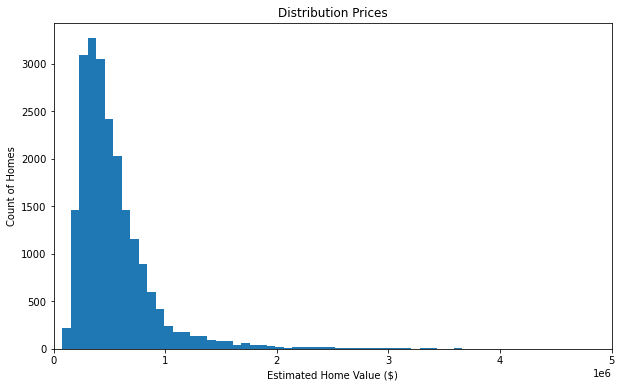

In [242]:
#Setting the frame and figsize
fig, ax = plt.subplots(figsize=(10, 6))

#Plotting the training portion of the target variables
ax.hist(y_train, bins=100)

#Setting labels and titles
ax.set_xlabel("Estimated Home Value ($)")
ax.set_ylabel("Count of Homes")
ax.set_title("Distribution Prices")

#Setting limit on the x axis
plt.xlim([0, 5000000])

# Baseline Model (1)


###  Initial Correlation

The initial linear regression model will be done with the most correlated feature. This will be considered our
baseline model.  From here we will do severation iterations to see if we can improve the model's performance.


Check for the highest correlated values to the target variable price. 
Correlation works on numerical values, not categorical ones.


In [13]:
#Print out correlation values in dataframe
corr = kc_df.corr()
corr

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,yr_built,zipcode
price,1.000000,0.308835,0.525933,0.701938,0.089868,0.256948,0.054015,-0.053381
bedrooms,0.308835,1.000000,0.514567,0.578211,0.032448,0.178196,0.155831,-0.154143
bathrooms,0.525933,0.514567,1.000000,0.755813,0.088396,0.502788,0.507247,-0.204782
sqft_living,0.701938,0.578211,0.755813,1.000000,0.173423,0.354350,0.318431,-0.199751
sqft_lot,0.089868,0.032448,0.088396,0.173423,1.000000,-0.004664,0.053100,-0.129583
floors,0.256948,0.178196,0.502788,0.354350,-0.004664,1.000000,0.488904,-0.059711
yr_built,0.054015,0.155831,0.507247,0.318431,0.053100,0.488904,1.000000,-0.347430
zipcode,-0.053381,-0.154143,-0.204782,-0.199751,-0.129583,-0.059711,-0.347430,1.000000


Correlation Graph: [Ref: Linear Reg Lab, #20](https://github.com/learn-co-curriculum/dsc-linear-regression-lab/tree/solution) 

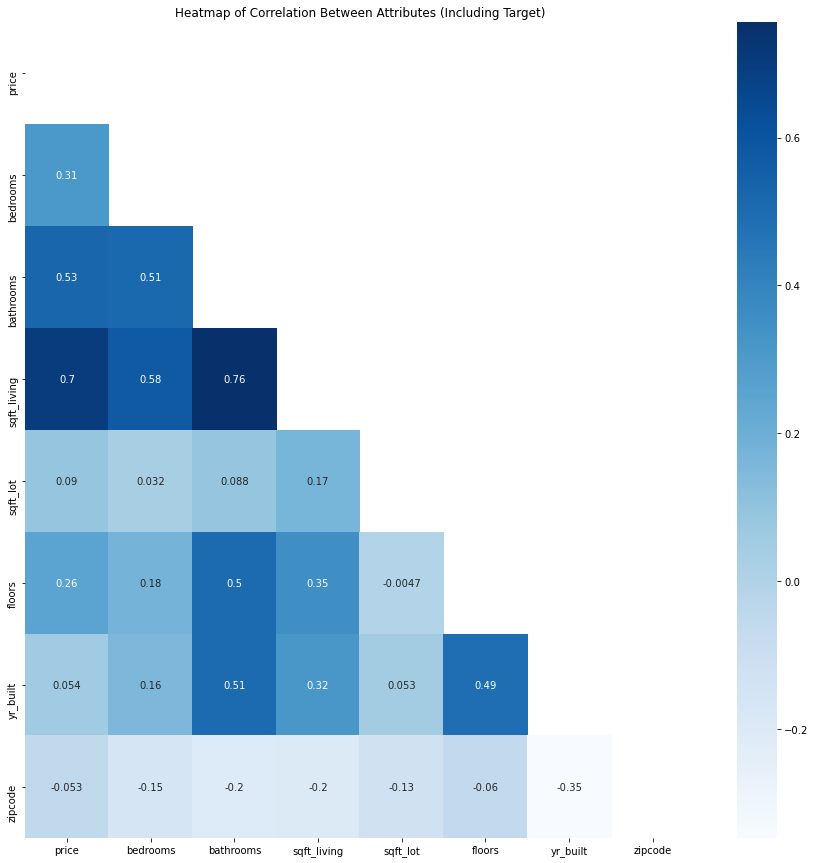

In [14]:
# Set up figure and axes
fig, ax = plt.subplots(figsize=(15, 15))

# Plot a heatmap of the correlation matrix, with both
# numbers and colors indicating the correlations
sns.heatmap(
    # Specifies the data to be plotted
    data=corr,
    # The mask means we only show half the values,
    # instead of showing duplicates. It's optional.
    mask=np.triu(np.ones_like(corr, dtype=bool)),
    # Specifies that we should use the existing axes
    ax=ax,
    #Color of the heatmap
    cmap="Blues",
    # Specifies that we want labels, not just colors
    annot=True,
    
)

# Customize the plot appearance
ax.set_title("Heatmap of Correlation Between Attributes (Including Target)");

"sqft_living" has a .7 correlation with the "price"

In [15]:
#Strongest numerical feature from the heatmap
most_correlated_feature = "sqft_living"


(150.0, 7500.0)

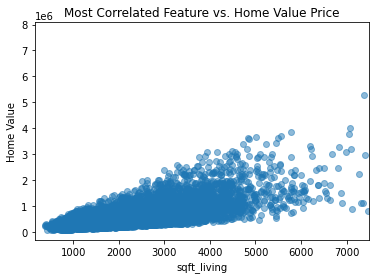

In [16]:
#Plot a scatter plot "Most Correlated Feature vs. Home Value"
fig, ax = plt.subplots()

ax.scatter(X_train[most_correlated_feature], y_train, alpha=0.5)
ax.set_xlabel(most_correlated_feature)
ax.set_ylabel("Home Value")
ax.set_title("Most Correlated Feature vs. Home Value Price");
plt.xlim([150, 7500])

The graph shows a fairly linear data between 300 and 5000 sqft of living.  The larger the sqft gets the more outliers.

### Modeling

Modeling the baseline feature using the basic train/test split first then a kfold validation methog

### Baseline Model - Basic Train Test Split

In [21]:
#Reshape training data to support modeling without error
X_train[most_correlated_feature]
X_array = np.array(X_train[most_correlated_feature])
newarr = X_array.reshape(-1,1)

#Reshape the test data to support modeling without error
X_test[most_correlated_feature]
X_array_test = np.array(X_test[most_correlated_feature])
newarr_test = X_array_test.reshape(-1,1)

In [22]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

In [23]:
linreg.fit(newarr, y_train)
LinearRegression()

LinearRegression()

In [243]:
#Add print out of previous models to keep reviweing
from sklearn.metrics import mean_squared_error

y_hat_train = linreg.predict(newarr)
y_hat_test = linreg.predict(newarr_test)

train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
Model_train_score = linreg.score(newarr,y_train)
Model_score = linreg.score(newarr_test,y_test)
print('Train Mean Squared Error:', train_mse)
print('Test Mean Squared Error: ', test_mse)
print()
print('Train Model Score: ', Model_train_score)
print('Test Model Score: ', Model_score)


Train Mean Squared Error: 67486348322.85598
Test Mean Squared Error:  72486529163.63557

Train Model Score:  0.4924392962767362
Test Model Score:  0.4933621300965373


Test Mean Squared Error is better than the Training Error. The base model score R2 is only .49. This base mode isn't strong enough to support predicting prices.  There may be better features or a combination of a few that hopefully will increase the score.

### Baseline Model- Kfold Validation

The Kfold score will be a mean of the various splits.

The least correlated feature is the zipcode. We wll drop it from the featureset before we train with more features.  It will probably be useful in scoping the areas to focus on in making predictions.

In [26]:
#dropping the target variable from the dataset features
X = kc_df.drop(["price","zipcode"], axis=1)
# Setting the target variable
y = kc_df["price"]

In [27]:
baseline_model = LinearRegression()

In [28]:
from sklearn.model_selection import cross_validate, ShuffleSplit

#Splitting the dataset in three sections with a .3 test size
splitter = ShuffleSplit(n_splits=3, test_size=0.2, random_state=42)

#Baseline scores using kfold cross validation
#Most correlated feature - sqft_living

baseline_scores = cross_validate(
    estimator=baseline_model,
    X=X[[most_correlated_feature]],
    y=y,
    return_train_score=True,
    cv=splitter
)


#Mean of the validation scores
print("Current Kfold Train score:     ", baseline_scores["train_score"].mean())
print("Current Kfold Validation score:", baseline_scores["test_score"].mean())
print()
#Validation Scores
print('Previous Train/Test Split Train Model Score: ', Model_train_score)
print('Previous Train/Test Split Test Model Score: ', Model_score)



Current Kfold Train score:      0.4897870088702527
Current Kfold Validation score: 0.5038514031437736

Previous Train/Test Split Train Model Score:  0.4924392962767362
Previous Train/Test Split Test Model Score:  0.4933621300965373


The Kfold method offers a higher validation mean score (.504) than the previous Train/Test score.  Both offer a higher score than their training score. 

# Second Model with Categories and Numerical Features (2)

Redo these models with Kfold cross validation

In [33]:
#Specify the groups of features in list for specific plottin uses

numerical = ['bedrooms', 'sqft_living','sqft_lot','floors',"bathrooms", "yr_built"]
categoricals = ['waterfront', 'condition', 'grade']
#Copying the original dataframe before any split
X_train_sec = X.copy()
y_train_sec = y.copy()

Ref: [Phase 2, Topic 20 Linear Reg Lab](https://github.com/learn-co-curriculum/dsc-linear-regression-lab/tree/solution)


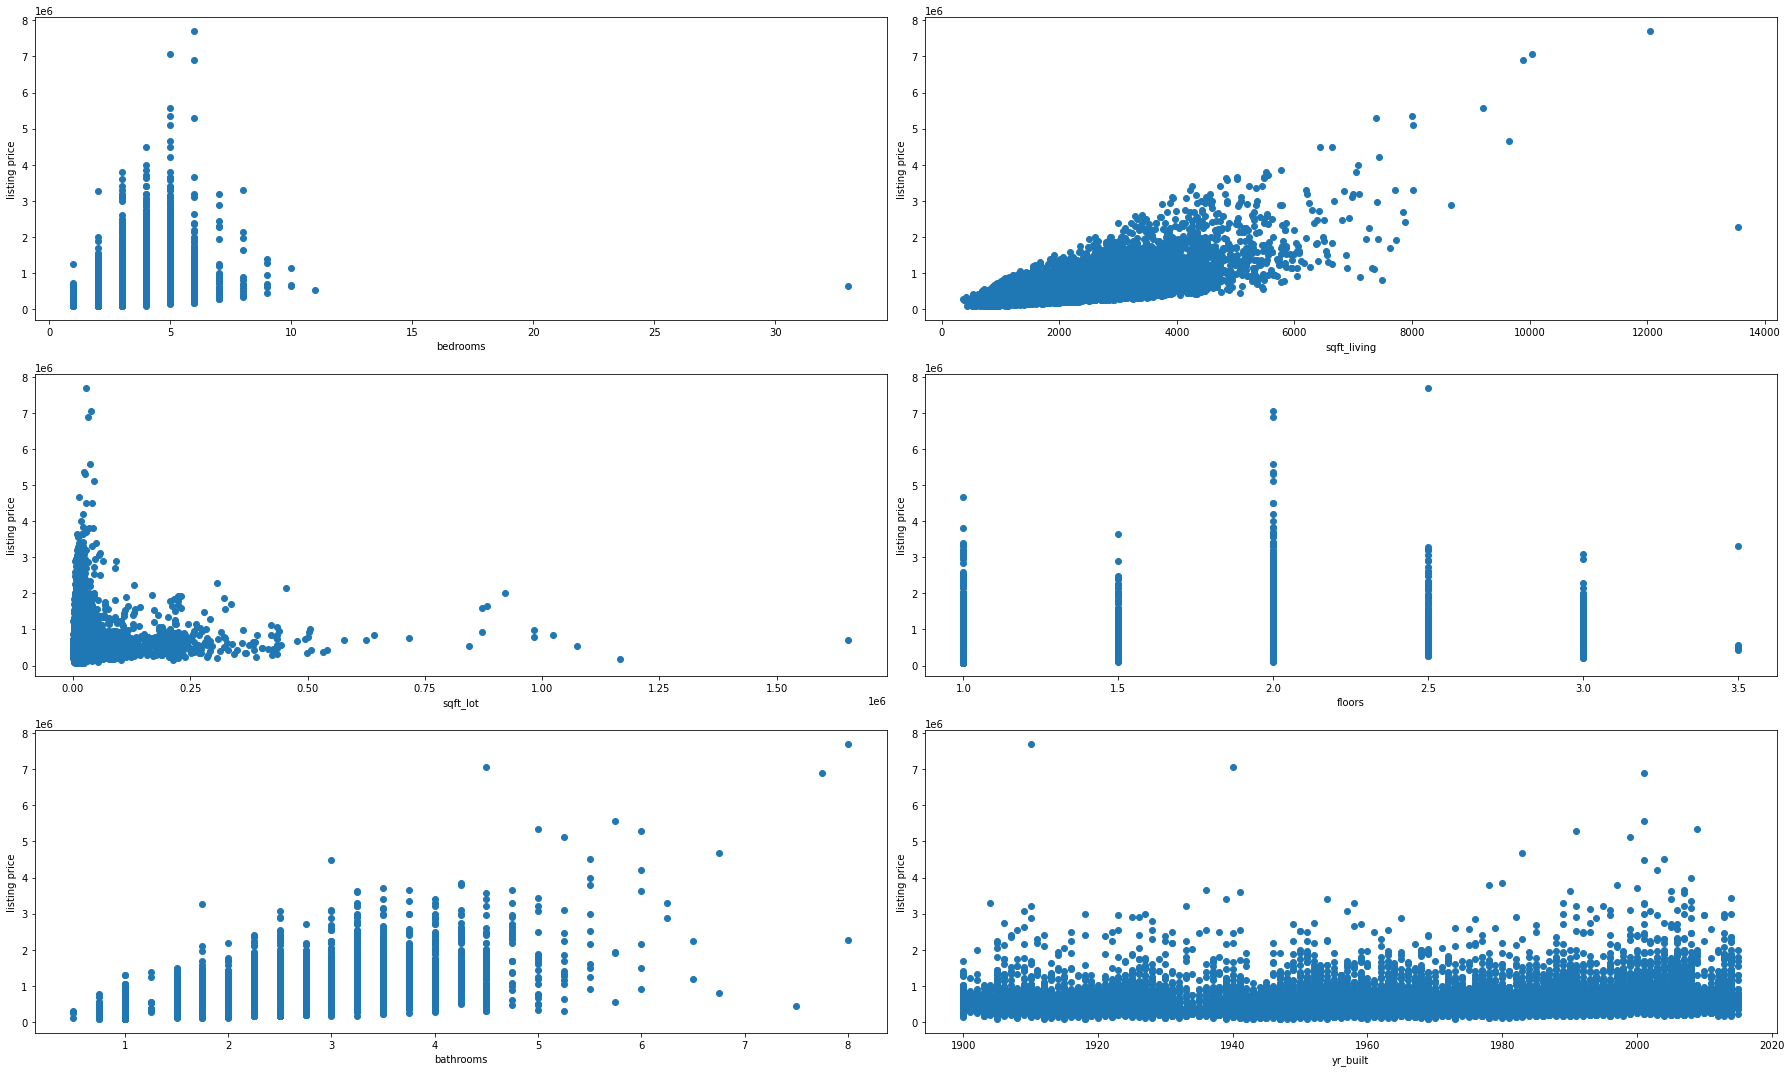

In [34]:
#Fix index error in plot
X_train_plot = X_train_sec[numerical]

fig, axes = plt.subplots(ncols=2, nrows=3, figsize=(25, 15))
fig.set_tight_layout(True)

for ide, c in enumerate(X_train_plot.columns):
    ax = axes[ide//2][ide%2]
    ax.scatter(X_train_plot[c], y_train_sec)
    ax.set_xlabel(c)
    ax.set_ylabel("listing price")
    

Checking for assumptions of model for all the  numerical features (except for zipcode). Zipcode is a cardinal numerical feature, but we will treat it like a categorical feature .

From the continous features sqft_living is the most linear, but skewed. The other skewed features are sqft_lot , bedrooms and bathrooms. 

Log transformations will be performed on the sqft_living and sqft_lot because of their skewness.
Standardization will be performed on  sqft_lot, sqft_living, bathrooms,bedrooms and yr_built.  We will treat bathrooms,bedrooms and yr_built as continous variables in this context because of the variaty of values.

"A heuristic you might use to select continous variables might be a combination of features that are not object datatypes and have at least a certain amount of unique values." Ref: [Phase 2 Module 20, Feature Scaling and Norm](https://github.com/learn-co-curriculum/dsc-feature-scaling-and-normalization-lab/tree/solution)

In [ ]:

# Create new split
#X_train_sec, X_test_sec, y_train_sec, y_test_sec = train_test_split(X_train_sec, y_train_sec, test_size=.3, random_state=42)

In [ ]:
#Convert categorical features into numbers - some are numbers with categories as well
# Run this cell without changes

print(X_train["waterfront"].value_counts())
print()
print(X_train["condition"].value_counts())
print()
print(X_train["grade"].value_counts())

In [35]:
#Setting column names for one hot encoded variables - Ref https://www.codementor.io/@abdelfettahbesbes/one-hot-encoding-in-data-science-1pe0lftu21
categoricals
cat_cols_encoded = []
for col in categoricals:
    cat_cols_encoded += [f"{col[0:2]}_{cat}" for cat in list(X[col].unique())]


In [217]:
#Creating a list of the features to transform
#Not doing floors
log_feat = ["sqft_lot", "sqft_living", ]
#The sqft_lot and sqft_living will be standardized to, but log transformed firest
stand_feat = [ "bedrooms","bathrooms","yr_built"]

In [218]:
#  import OneHotEncoder from sklearn.preprocessing
from sklearn.preprocessing import OneHotEncoder, Normalizer, StandardScaler, FunctionTransformer

# Instantiate transformers
log_transformer = FunctionTransformer(np.log, validate=True)
ohe = OneHotEncoder(sparse=False) # did not drop the first one
scaler = StandardScaler()


# Fit and/or transform a select amount of features

#log_feat = ["sqft_lot", "sqft_living"]
X_train_log = log_transformer.fit_transform(X_train_sec[log_feat])

#stand_feat = ["sqft_lot", "sqft_living", "bedrooms", "bathrooms", "yr_built"]
X_train_scale_log = scaler.fit_transform(X_train_log )
X_train_scale = scaler.fit_transform(X_train_sec[stand_feat] )
#categoricals = ['waterfront', 'condition', 'grade']
X_train_ohe = ohe.fit_transform(X_train_sec[categoricals])


#Concatenate transformed data
X_train_sec_tran = pd.concat([
        pd.DataFrame(X_train_scale_log, columns= log_feat, index=X_train_sec.index),
        X_train_sec["floors"],
        pd.DataFrame(X_train_scale, columns= stand_feat, index=X_train_sec.index),
        pd.DataFrame(X_train_ohe, columns = cat_cols_encoded, index=X_train_sec.index),
        
    ], axis=1)

In [163]:
X_train_sec_tran.columns

Index(['sqft_lot', 'sqft_living', 'floors', 'bedrooms', 'bathrooms',
       'yr_built', 'wa_Unk', 'wa_NO', 'wa_YES', 'co_Average', 'co_Very Good',
       'co_Good', 'co_Poor', 'co_Fair', 'gr_7 Average', 'gr_6 Low Average',
       'gr_8 Good', 'gr_11 Excellent', 'gr_9 Better', 'gr_5 Fair',
       'gr_10 Very Good', 'gr_12 Luxury', 'gr_4 Low', 'gr_3 Poor',
       'gr_13 Mansion'],
      dtype='object')

In [244]:
#Drop the first col of each ohe CAT 
X_train_sec= X_train_sec_tran.drop(['wa_Unk','co_Average','gr_7 Average'], axis=1)
#X_test_sec= X_test_sec.drop(['wa_Unk','co_Average','gr_7 Average'], axis=1)

In [215]:
linreg_tran = LinearRegression()

In [267]:

#Splitting the dataset in three sections with a .3 test size
splitter = ShuffleSplit(n_splits=4, test_size=0.2, random_state=42)


#Most correlated feature - sqft_living

second_scores = cross_validate(
    estimator=linreg_tran,
    X=X_train_sec,
    y=y_train_sec,
    return_train_score=True,
    cv=splitter
)


#Mean of the Current kfold validation scores
print("Current Model Kfold Train score:     ", second_scores["train_score"].mean())
print("Current Model Validation score:", second_scores["test_score"].mean())
print()
#Mean of the Baseline kfold validation scores
print("Previous Kfold Train Model score:     ", baseline_scores["train_score"].mean())
print("Previous Kfold Validation Model score:", baseline_scores["test_score"].mean())
print()
#Mean of the Baseline validation scores
print('Previous Train/Test Split Train Model Score: ', Model_train_score)
print('Previous Train/Test Split Test Model Score: ', Model_score)




Current Model Kfold Train score:      0.654295578069265
Current Model Validation score: 0.6742716133658944

Previous Kfold Train Model score:      0.4897870088702527
Previous Kfold Validation Model score: 0.5038514031437736

Previous Train/Test Split Train Model Score:  0.4924392962767362
Previous Train/Test Split Test Model Score:  0.4933621300965373


##### 

The current model has increase the R2 score for the validation model by ~.17.  This means we increased 
the ability for our model to understand the variance in the model by 17%. The validation model is bettern than the train model, therefore it is not overfitted.
So far we will keep this current model. Ww 

In [ ]:
#Unsure how to get MSE and RMSE from this above

In [ ]:
linreg2.fit(X_train_sec, y_train_sec)

In [ ]:
y_hat_train = linreg2.predict(X_train_sec)
y_hat_test = linreg2.predict(X_test_sec)

In [ ]:
train_mse = mean_squared_error(y_train_sec, y_hat_train)
test_mse = mean_squared_error(y_test_sec, y_hat_test)
Model_train_score = linreg2.score(X_train_sec,y_train_sec)
Model_score = linreg2.score(X_test_sec, y_test_sec)
print('Train Mean Squared Error:', train_mse)
print('Test Mean Squared Error: ', test_mse)


In [ ]:
#plotting the linearity zoomed in
fig, ax = plt.subplots(figsize = (10,10))

perfect_line = np.arange(y_test.min(), y_test.max())
ax.plot(perfect_line, linestyle="--", color="orange", label="Perfect Fit")
ax.scatter(y_test, y_hat_test, alpha=0.5)
ax.set_xlabel("Actual Price")
ax.set_ylabel("Predicted Price")
plt.xlim([0, 1000000])
ax.legend();

With the results of the second model, it seems that the model is overfit for the training model.
The MSE an R2 are higher now that we used more of the data and transformed the categories with OHE.

# Investigating Multicollinearity

We will also removed zipcode from the features.  It had the lowest correlation coefficient from previous graphing.

In [161]:
X_train_sec_tran.columns

Index(['sqft_lot', 'sqft_living', 'bedrooms', 'bathrooms', 'yr_built', 'wa_NO',
       'wa_YES', 'co_Very Good', 'co_Good', 'co_Poor', 'co_Fair',
       'gr_6 Low Average', 'gr_8 Good', 'gr_11 Excellent', 'gr_9 Better',
       'gr_5 Fair', 'gr_10 Very Good', 'gr_12 Luxury', 'gr_4 Low', 'gr_3 Poor',
       'gr_13 Mansion', 'floors'],
      dtype='object')

In [246]:
import statsmodels.api as sm

#Build model
stats_model = sm.OLS(y_train_sec, sm.add_constant(X_train_sec)).fit()

In [222]:
#View model
stats_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.659
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     1893.
Date:                Wed, 21 Dec 2022   Prob (F-statistic):               0.00
Time:                        02:45:58   Log-Likelihood:            -2.9569e+05
No. Observations:               21590   AIC:                         5.914e+05
Df Residuals:                   21567   BIC:                         5.916e+05
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             9.334e+05   9722.432     96.009      0.000    9.14e+05    9.52e+05
sqft_lot         -2.711e+04   1754.786    -15.448      0.000   -3.05e+04   -2.37e+04
sqft_living       9.388e+04   3140.278     29.896      0.000    8.77e+04       1e+05
floors            5106.3725   3665.254      1.393      0.164   -2077.797    1.23e+04
bedrooms         -1.669e+04   1941.202     -8.600      0.000   -2.05e+04   -1.29e+04
bathrooms         5.787e+04   2635.281     21.961      0.000    5.27e+04     6.3e+04
yr_built         -1.052e+05   1963.803    -53.588      0.000   -1.09e+05   -1.01e+05
wa_NO              326.9064   4672.236      0.070      0.944   -8831.021    9484.834
wa_YES            7.713e+05   1.81e+04     42.679      0.000    7.36e+05    8.07e+05
co_Very Good     -1.917e+04   1.68e+04     -1.143      0.253   -5.21e+04    1.37e+04
co_Good            2.15e+04   3645.248      5.897      0.000    1.44e+04    2.86e+04
co_Poor           -1.98e+04   4.03e+04     -0.492      0.623   -9.87e+04    5.91e+04
co_Fair           5.518e+04   5857.261      9.421      0.000    4.37e+04    6.67e+04
gr_6 Low Average  3.446e+05   1.26e+04     27.364      0.000     3.2e+05    3.69e+05
gr_8 Good         9.293e+05   2.39e+04     38.889      0.000    8.82e+05    9.76e+05
gr_11 Excellent   2.325e+06   6.02e+04     38.597      0.000    2.21e+06    2.44e+06
gr_9 Better      -5.529e+05   2.15e+05     -2.570      0.010   -9.75e+05   -1.31e+05
gr_5 Fair        -5.519e+05   4.29e+04    -12.851      0.000   -6.36e+05   -4.68e+05
gr_10 Very Good   -6.21e+05   1.71e+04    -36.209      0.000   -6.55e+05   -5.87e+05
gr_12 Luxury     -5.901e+05   1.04e+04    -56.820      0.000    -6.1e+05    -5.7e+05
gr_4 Low         -5.246e+05   8209.496    -63.905      0.000   -5.41e+05   -5.09e+05
gr_3 Poor        -4.199e+05   7530.117    -55.768      0.000   -4.35e+05   -4.05e+05
gr_13 Mansion    -2.321e+05   7755.400    -29.934      0.000   -2.47e+05   -2.17e+05
==============================================================================
Omnibus:                    13906.256   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           651251.859
Skew:                           2.482   Prob(JB):                         0.00
Kurtosis:                      29.444   Cond. No.                         288.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [198]:
#Which ones would should be eliminated based on p value?

Looks like there is a lot of multicolinearity in the model. The features that are above the needed p-value are: 
"floors", "co_Poor", "co_Very Good", "wa_NO" . We will run RFE to see if some of the same values are chosen

# Feature Recommendations with RFECV

In [263]:
#2nd iteration of the model with kfold instead of test split and RFECV Ref Linear Algebra Lab
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate, ShuffleSplit

splitter = ShuffleSplit(n_splits=4, test_size=0.2, random_state=42)

#Initiate linear Refression model
model_for_RFECV = LinearRegression()


# Instantiate and fit the selector
selector = RFECV(model_for_RFECV, cv=splitter)
selector.fit(X_train_sec, y_train_sec)


# Print the results Ref: [Phase 2, Topic 20, Linear Regression Lab]
print("Non Recommended Features")
#List for Reocmmended dropped columns
RFECV_rec_drop_col = []
for index, col in enumerate(X_train_sec.columns):
    if selector.support_[index] == False:
        print(f"{col}: {selector.support_[index]}")
        RFECV_rec_drop_col.append(col)

Non Recommended Features
floors: False
bedrooms: False
wa_NO: False


In [234]:
print("Rec P-value based drop: " "floors,", "co_Poor,", "co_Very Good,", "wa_NO" )
print("Rec RFECV based drop: ",   RFECV_rec_drop_col[0],",", RFECV_rec_drop_col[1] )

Rec P-value based drop: floors, co_Poor, co_Very Good, wa_NO
Rec RFECV based drop:  floors , wa_NO


The two methods agree on dropping "floors" and "wa_NO" in addition to the "co_Poor" and co_Very Good.
On the next model all four features will be dropped. RFE was used on a dataset with 22 predictors, this may not have been a big help becasue of this.

In [249]:
rec_drop_col = ["floors", "co_Poor", "co_Very Good", "wa_NO","bedrooms"]
X_train_sec_drop = X_train_sec.drop( rec_drop_col, axis =1)   

In [298]:
#Build model
model = sm.OLS(y_train_sec, sm.add_constant(X_train_third)).fit()

In [299]:
#Model the stats model
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.659
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     2313.
Date:                Wed, 21 Dec 2022   Prob (F-statistic):               0.00
Time:                        03:50:04   Log-Likelihood:            -2.9569e+05
No. Observations:               21590   AIC:                         5.914e+05
Df Residuals:                   21571   BIC:                         5.916e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             9.422e+05   7290.180    129.238      0.000    9.28e+05    9.56e+05
sqft_lot         -2.808e+04   1643.420    -17.089      0.000   -3.13e+04   -2.49e+04
sqft_living       9.421e+04   3134.533     30.057      0.000    8.81e+04       1e+05
bedrooms         -1.678e+04   1940.162     -8.650      0.000   -2.06e+04    -1.3e+04
bathrooms         5.848e+04   2597.993     22.508      0.000    5.34e+04    6.36e+04
yr_built         -1.045e+05   1912.161    -54.649      0.000   -1.08e+05   -1.01e+05
wa_YES            7.716e+05   1.81e+04     42.724      0.000    7.36e+05    8.07e+05
co_Good           2.133e+04   3599.849      5.927      0.000    1.43e+04    2.84e+04
co_Fair           5.507e+04   5828.248      9.450      0.000    4.37e+04    6.65e+04
gr_6 Low Average  3.447e+05   1.26e+04     27.371      0.000     3.2e+05    3.69e+05
gr_8 Good         9.292e+05   2.39e+04     38.887      0.000    8.82e+05    9.76e+05
gr_11 Excellent   2.324e+06   6.02e+04     38.587      0.000    2.21e+06    2.44e+06
gr_9 Better      -5.528e+05   2.15e+05     -2.569      0.010   -9.75e+05   -1.31e+05
gr_5 Fair         -5.56e+05   4.29e+04    -12.973      0.000    -6.4e+05   -4.72e+05
gr_10 Very Good  -6.236e+05   1.71e+04    -36.568      0.000   -6.57e+05    -5.9e+05
gr_12 Luxury      -5.92e+05   1.03e+04    -57.357      0.000   -6.12e+05   -5.72e+05
gr_4 Low         -5.264e+05   8119.954    -64.826      0.000   -5.42e+05    -5.1e+05
gr_3 Poor        -4.208e+05   7508.295    -56.040      0.000   -4.35e+05   -4.06e+05
gr_13 Mansion    -2.323e+05   7754.457    -29.956      0.000   -2.47e+05   -2.17e+05
==============================================================================
Omnibus:                    13889.147   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           649290.347
Skew:                           2.478   Prob(JB):                         0.00
Kurtosis:                      29.405   Cond. No.                         239.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Create a third model with the best features to use

In [272]:
#Top features

splitter = ShuffleSplit(n_splits=4, test_size=0.2, random_state=42)

third_model = LinearRegression()
X_train_third = X_train_sec_drop
y_train_third = y_train_sec

third_scores = cross_validate(
    estimator=third_model,
    X=X_train_third,
    y=y_train_third,
    return_train_score=True,
    cv=splitter
)



#Mean of the Third validation scores
print('Current Train Model Score: ', third_scores["train_score"].mean())
print('Current Validation Model Score: ', third_scores["test_score"].mean())
print()
#Mean of the Second kfold validation scores
print("Second Model Kfold Train score:     ", second_scores["train_score"].mean())
print("Second Model Validation score:", second_scores["test_score"].mean())
print()
#Mean of the Baseline kfold validation scores
print("Previous Kfold Train Model score:     ", baseline_scores["train_score"].mean())
print("Previous Kfold Validation Model score:", baseline_scores["test_score"].mean())
print()
#Mean of the Baseline validation scores
print('Previous Train/Test Split Train Model Score: ', Model_train_score)
print('Previous Train/Test Split Test Model Score: ', Model_score)


Current Train Model Score:  0.6542151631115112
Current Validation Model Score:  0.6744056346516865

Second Model Kfold Train score:      0.654295578069265
Second Model Validation score: 0.6742716133658944

Previous Kfold Train Model score:      0.4897870088702527
Previous Kfold Validation Model score: 0.5038514031437736

Previous Train/Test Split Train Model Score:  0.4924392962767362
Previous Train/Test Split Test Model Score:  0.4933621300965373


There isn't a big change in the third and second model score. We will keep the third model.

# Polynomial Feature Check

The model R2 seems to plataue even applying log, some standardixation and dropping certain features. There are quite a few outliers that may make applying polynomial features a good method to see. 


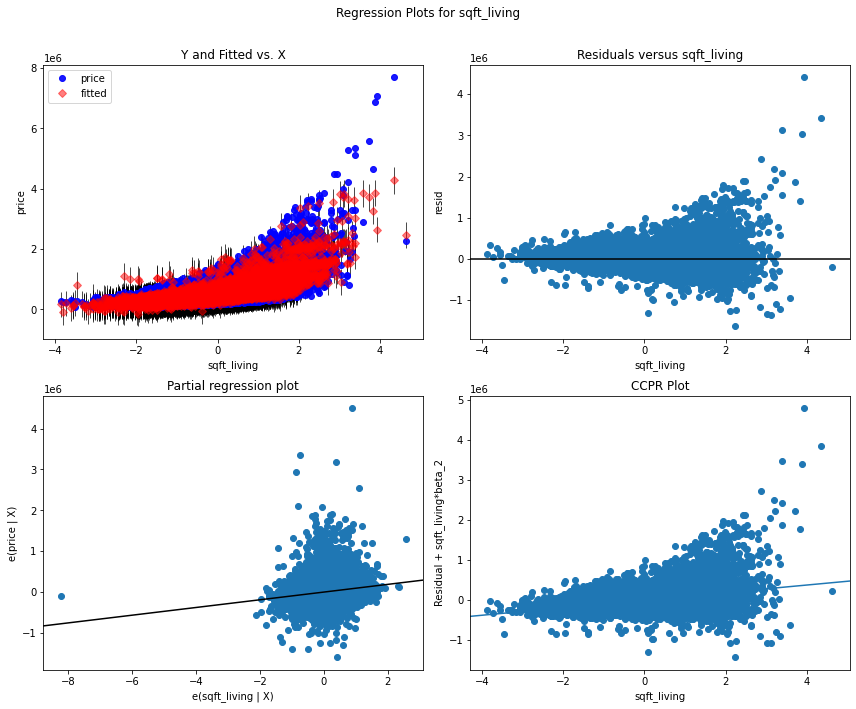

In [306]:
fig = plt.figure(figsize=(12,10))
fig = sm.graphics.plot_regress_exog(model, 'sqft_living', fig=fig)

In [319]:
from sklearn.preprocessing import PolynomialFeatures

# cROSS VALIDATION AND TRAIN TEST SPLIT
poly = PolynomialFeatures(degree = 2)
X_poly_train = poly.fit_transform( X_train_third)


reg_poly = LinearRegression()
poly_score= cross_validate(
                        reg_poly,X_poly_train, y_train_third, cv=splitter, 
                        return_train_score=True
                        
)

#Polynomial Scores
print ('Current Train Poly Model Score:',poly_score["train_score"].mean())
print ('Current Validation Poly Model Score: ',poly_score["test_score"].mean())
print()
#Mean of the Third validation scores
print('Third Train Model Score: ', third_scores["train_score"].mean())
print('Third Validation Model Score: ', third_scores["test_score"].mean())
print()
#Mean of the Second kfold validation scores
print("Second Model Kfold Train score:     ", second_scores["train_score"].mean())
print("Second Model Validation score:", second_scores["test_score"].mean())
print()
#Mean of the Baseline kfold validation scores
print("Previous Kfold Train Model score:     ", baseline_scores["train_score"].mean())
print("Previous Kfold Validation Model score:", baseline_scores["test_score"].mean())
print()
#Mean of the Baseline validation scores
print('Previous Train/Test Split Train Model Score: ', Model_train_score)
print('Previous Train/Test Split Validation Model Score: ', Model_score)

Current Train Poly Model Score: 0.7244903208055303
Current Validation Poly Model Score:  0.7253298654518127

Third Train Model Score:  0.6542151631115112
Third Validation Model Score:  0.6744056346516865

Second Model Kfold Train score:      0.654295578069265
Second Model Validation score: 0.6742716133658944

Previous Kfold Train Model score:      0.4897870088702527
Previous Kfold Validation Model score: 0.5038514031437736

Previous Train/Test Split Train Model Score:  0.4924392962767362
Previous Train/Test Split Validation Model Score:  0.4933621300965373


Poly fit works the best

In [274]:
best_features = X_train_third.columns

In [320]:
X_train_final = X[best_features]
y_train_final = y["price"]

KeyError: "['gr_11 Excellent', 'co_Good', 'gr_13 Mansion', 'gr_10 Very Good', 'gr_3 Poor', 'wa_YES', 'gr_12 Luxury', 'gr_4 Low', 'gr_8 Good', 'gr_6 Low Average', 'co_Fair', 'gr_5 Fair', 'gr_9 Better'] not in index"

# Interprest final Model

In [ ]:
best_features = X_train_third.columns

In [ ]:
#Interpret Model  - msE LOOK AT linear regression lab to see BUSINESS interpretation

# Final model

In [ ]:
#Transform data set by changing the condition or grade and try to predict on final model



# Model Prediction

A real estate agent would be better useful if it targets speciic areas versus random houses all over the County.
They could target similar grade and condition houses for improvement.  The grade and contion does not account 
for all of the things that would create a comp but these will the scope for this analysis

In [13]:
#Zipcode group by to create focus of data set to predict with in the future
zip_df = kc_df.groupby(["grade", "zipcode"], sort = True).count()
a = zip_df.sort_values("grade", ascending = True)
a

price  bedrooms  bathrooms  sqft_living  sqft_lot  \
grade         zipcode                                                      
10 Very Good  98001        5         5          5            5         5   
              98074       80        80         80           80        80   
              98075      120       120        120          120       120   
              98077       36        36         36           36        36   
              98092       10        10         10           10        10   
              98102        6         6          6            6         6   
              98103        4         4          4            4         4   
              98105       17        17         17           17        17   
              98106        1         1          1            1         1   
              98107        1         1          1            1         1   
              98109        6         6          6            6         6   
              98112       37        37         37           37        37   
              98115       10        10         10           10        10   
              98116       11        11         11           11        11   
              98117       12        12         12           12        12   
              98118        8         8          8            8         8   
              98119        9         9          9            9         9   
              98122        9         9          9            9         9   
              98125        1         1          1            1         1   
              98126        1         1          1            1         1   
              98136        6         6          6            6         6   
              98144       14        14         14           14        14   
              98146        2         2          2            2         2   
              98155        2         2          2            2         2   
              98166        6         6          6            6         6   
              98168        1         1          1            1         1   
              98177       15        15         15           15        15   
              98178        1         1          1            1         1   
              98188        2         2          2            2         2   
              98199       33        33         33           33        33   
              98072       25        25         25           25        25   
              98070        3         3          3            3         3   
              98198        2         2          2            2         2   
              98059       16        16         16           16        16   
              98065       16        16         16           16        16   
              98003       10        10         10           10        10   
              98004       57        57         57           57        57   
              98005       15        15         15           15        15   
              98007       15        15         15           15        15   
              98008        9         9          9            9         9   
              98010        9         9          9            9         9   
              98011        5         5          5            5         5   
              98014        2         2          2            2         2   
              98019        4         4          4            4         4   
              98022        2         2          2            2         2   
              98023       20        20         20           20        20   
              98024        4         4          4            4         4   
              98027       44        44         44           44        44   
              98028        6         6          6            6         6   
              98006       76        76         76           76        76   
              98030        3         3          3            3         